In [1]:
from matplotlib.text import Text
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [2]:
# generate data if you don't have any already.
n = 20
g = 9.806
v0 = 12.22
y0 = 0.33
sy = 0.5
data_x = np.linspace(0, 2, n)
data_y = y0 + v0 * data_x - 0.5 * g * data_x ** 2 + np.random.randn(n) * sy
data_sy = sy + np.random.randn(n) * sy / 10

In [3]:
d = pd.DataFrame(data={'time': [round(x, 2) for x in data_x],
                       'pos': [round(x, 2) for x in data_y],
                       's_pos': [round(x, 2) for x in data_sy]})
d.to_excel("data.xls")

In [4]:
d = pd.read_excel("data.xls")
d

,Unnamed: 0,time,pos,s_pos
0,0,0.00,0.30,0.38
1,1,0.11,1.76,0.51
2,2,0.21,2.51,0.50
3,3,0.32,4.50,0.49
4,4,0.42,4.12,0.46
5,5,0.53,5.73,0.39
6,6,0.63,6.33,0.46
7,7,0.74,7.46,0.52
8,8,0.84,7.14,0.46
9,9,0.95,8.63,0.43


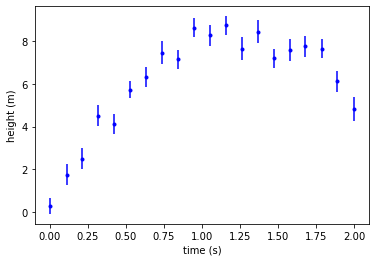

In [5]:
# plot data
plot.errorbar(d['time'], d['pos'], d['s_pos'], fmt='b.')
plot.ylabel("height (m)")
plot.xlabel("time (s)")
Text(0.5, 0, 'time (s)')
plot.show()


In [6]:
# set up the model
def model(x, m, b):
    return m * x + b

In [7]:
# do the fit
init_guess = [1, 1]

fit = curve_fit(model, d['time'], d['pos'], sigma=d['s_pos'], p0=init_guess, absolute_sigma=True)

In [8]:
# unpack the results
ans, cov = fit
fit_m, fit_b = ans
fit_sm, fit_sb = np.sqrt(np.diag(cov))

In [9]:
# print the fit results:
print("m: %.2f +/- %.2f" % (fit_m, fit_sm))
print("b: %.2f +/- %.2f" % (fit_b, fit_sb))

m: 2.81 +/- 0.17
b: 3.35 +/- 0.20


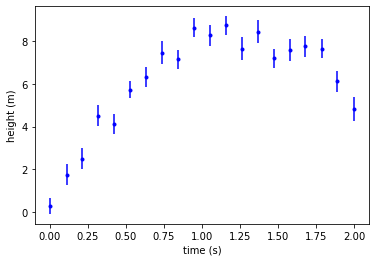

covariance:
[[ 0.02987045 -0.02861504]
 [-0.02861504  0.03832606]]


In [10]:
# plot the data and fit results
plot.errorbar(d['time'], d['pos'], d['s_pos'], fmt='b.', label="data")
plot.ylabel("height (m)")
plot.xlabel("time (s)")
plot.show()
print("covariance:")
print(cov)

In [11]:
t = np.linspace(0, 2)

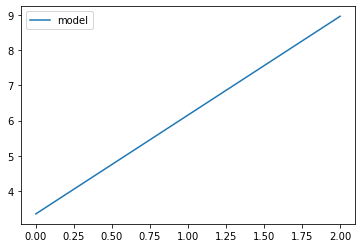

In [12]:
plot.plot(t, model(t, fit_m, fit_b), label="model")
plot.legend()
plot.show()

In [13]:
# compute chi-square
chisq = sum((d['pos'] - model(d['time'], fit_m, fit_b)) ** 2 / d['s_pos'] ** 2)
plot.figtext(0.5, 0.2, "chi-square: %.2f" % chisq, fontweight="bold")

Text(0.5, 0.2, 'chi-square: 298.13')

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'time (s)')

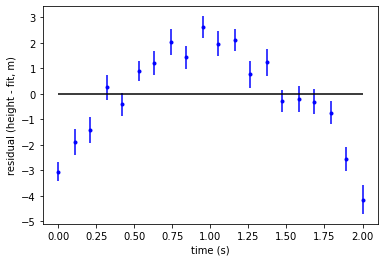

In [14]:
# make a residuals plot
plot.figure()
plot.errorbar(d['time'], d['pos'] - model(d['time'], fit_m, fit_b), d['s_pos'], fmt='b.')
plot.hlines(0, d['time'].min(), d['time'].max())
plot.ylabel("residual (height - fit, m)")
plot.xlabel("time (s)")